In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [17]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [18]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

# OPEN DATA PROJECT
## Finding out whether there is a correlation between child immunisation and higher education (tertiary) enrollment.

## Why did I choose this data?

In [46]:
from IPython.display import Image
Image(url='http://cdn.iflscience.com/images/610d4613-1b63-5db1-8203-aa881b3f8c09/content-1488280999-animation-7.gif')


# Importing the Data Set
### from health.gov.au, education.gov.au and censusdata.abs.gov.au

In [19]:
"""Opening the data set."""

imm_01 = pd.read_csv("immunisation_table01.csv").iloc[:-1]

imm_02 = pd.read_csv("immunisation_table02.csv").iloc[:-1]

imm_03 = pd.read_csv("immunisation_table03.csv").iloc[:-1]

filepath = "2006_all_students.xls"
local_data = pd.read_excel(filepath, sheetname="5", skiprows=2)
LD_perage = pd.read_excel(filepath, sheetname="2", skiprows=2)

filepathCensus = "CensusData_01.xls"
#print(os.path.isfile(filepathCensus))

census = pd.read_excel(filepathCensus, skiprows=8)

# Immunisation data from 2016

## Cohort 1 (12 -< 15 Months)

In [20]:
imm_01

,State,Age Group,% DTP,% Polio,% HIB,% Hep B,% MMR,% Pneumo,% MenC,% Varicella,% Fully Immunised*
0,ACT,12-<15 Months,96.11,95.99,95.71,95.90,n/a,95.79,n/a,n/a,95.14
1,NSW,12-<15 Months,94.41,94.37,94.08,94.35,n/a,93.97,n/a,n/a,93.48
2,VIC,12-<15 Months,94.69,94.65,94.28,94.55,n/a,94.27,n/a,n/a,93.66
3,QLD,12-<15 Months,94.73,94.71,94.53,94.75,n/a,94.45,n/a,n/a,94.12
4,SA,12-<15 Months,94.54,94.50,94.26,94.49,n/a,94.23,n/a,n/a,93.85
5,WA,12-<15 Months,93.74,93.71,93.43,93.56,n/a,93.35,n/a,n/a,92.84
6,TAS,12-<15 Months,94.46,94.39,94.13,94.55,n/a,94.18,n/a,n/a,93.76
7,NT,12-<15 Months,93.80,93.74,93.40,93.74,n/a,93.45,n/a,n/a,92.80


## Cohort 2 (24 -< 27 Months)

In [21]:
imm_02

,State,Age Group,% DTP**,% Polio,% HIB,% Hep B,% MMR,% Pneumo,% Men C***,% Varicella***,% Fully Immunised***
0,ACT,24-<27 Months,96.04,96.92,95.97,96.88,93.85,n/a,95.61,93.63,91.92
1,NSW,24-<27 Months,94.97,96.04,94.92,95.90,92.86,n/a,94.86,92.79,90.47
2,VIC,24-<27 Months,95.43,96.50,95.60,96.30,93.44,n/a,95.35,93.57,91.36
3,QLD,24-<27 Months,95.39,96.23,95.66,96.10,93.75,n/a,95.59,93.36,92.10
4,SA,24-<27 Months,94.97,96.21,95.28,96.05,93.34,n/a,95.31,93.21,91.19
5,WA,24-<27 Months,94.70,96.14,95.04,95.88,92.11,n/a,94.77,91.77,90.12
6,TAS,24-<27 Months,95.62,96.54,96.22,96.51,94.34,n/a,96.27,93.83,92.03
7,NT,24-<27 Months,94.61,96.15,95.60,96.23,91.89,n/a,95.16,90.96,88.54


## Cohort 3 (60 -< 63 Months)

In [22]:
imm_03

,State,Age Group,% DTP,% Polio,% HIB,% Hep B,% MMR,% Pneumo,% MenC,% Varicella,% Fully Immunised
0,ACT,60-<63 Months,94.27,94.32,n/a,n/a,94.57,n/a,n/a,n/a,93.52
1,NSW,60-<63 Months,94.14,94.20,n/a,n/a,94.32,n/a,n/a,n/a,93.48
2,VIC,60-<63 Months,94.55,94.64,n/a,n/a,94.68,n/a,n/a,n/a,93.77
3,QLD,60-<63 Months,94.18,94.18,n/a,n/a,94.34,n/a,n/a,n/a,93.48
4,SA,60-<63 Months,94.13,94.16,n/a,n/a,94.40,n/a,n/a,n/a,93.39
5,WA,60-<63 Months,92.19,92.24,n/a,n/a,92.87,n/a,n/a,n/a,91.45
6,TAS,60-<63 Months,94.96,94.98,n/a,n/a,94.75,n/a,n/a,n/a,94.06
7,NT,60-<63 Months,93.15,93.18,n/a,n/a,93.66,n/a,n/a,n/a,92.39


# Combining the three immunisation cohorts into one graph.

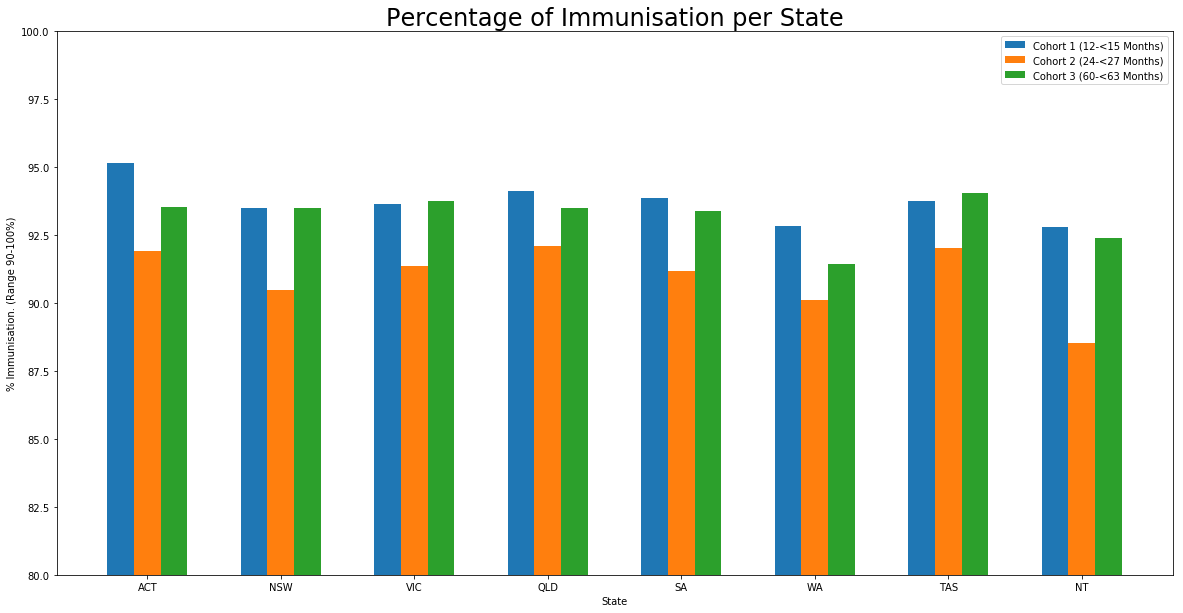

In [40]:
intervals = range(len(imm_01["State"]))
labels = list(imm_01["State"])
index = np.arange(len(imm_01["State"]))

plt.subplot(111)

plt.bar(index - 0.2, imm_01["% Fully Immunised*"], width=0.2, align="center", label="Cohort 1 (12-<15 Months)");
plt.bar(index, imm_02["% Fully Immunised***"], width=0.2, align="center", label="Cohort 2 (24-<27 Months)");
plt.bar(index + 0.2, imm_03["% Fully Immunised"], width=0.2, align="center", label="Cohort 3 (60-<63 Months)");

plt.xticks(intervals, labels);
plt.ylim([80,100])
plt.title("Percentage of Immunisation per State", size=24);
plt.ylabel("% Immunisation. (Range 90-100%)");
plt.xlabel("State");
plt.legend();

## Adding all the immunisation cohorts together per state and finding out the state's average immunisation rate.

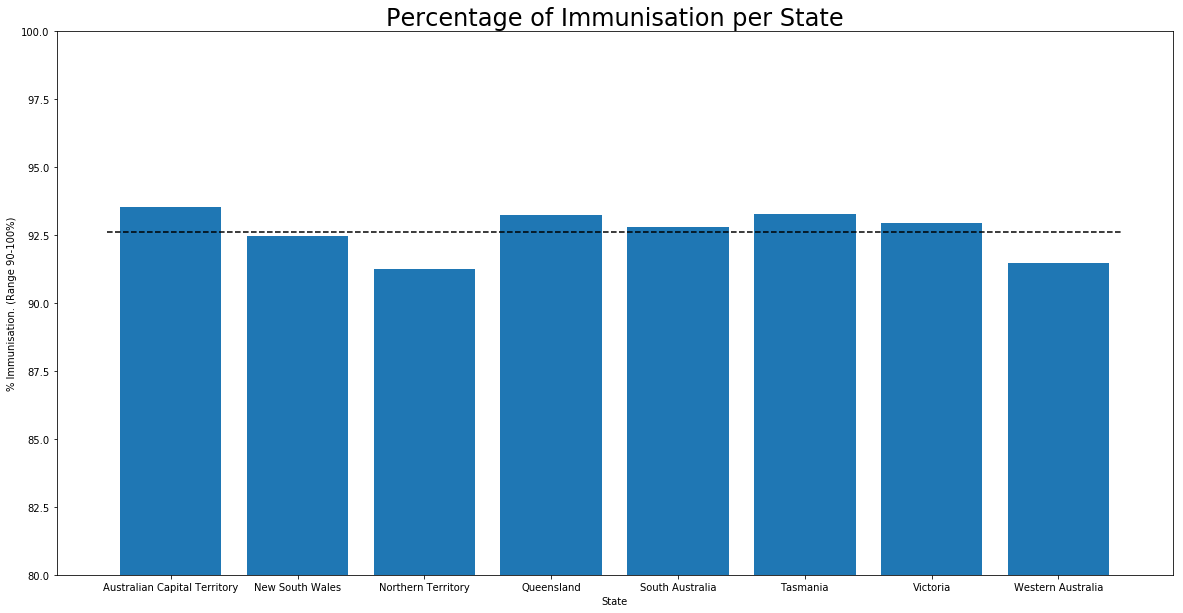

In [74]:
"""Merging all the Cohort as a percentage."""

imm_addition = []
for i in range(len(imm_01["State"])):
    imm_addition.append(imm_01["% Fully Immunised*"][i] + imm_02["% Fully Immunised***"][i] + imm_03["% Fully Immunised"][i])
# imm_addition


sorted_imm = sorted(zip(imm_01["State"], imm_addition))
sorted_imm

percentage_imm = []
for i in range(len(sorted_imm)):
    percentage_imm.append(sorted_imm[i][1] / 3)
percentage_imm

average_imm = sum(percentage_imm) / len(imm_01["State"])
average_imm

intervals = range(len(sorted_imm))

plt.bar(intervals, percentage_imm);

plt.xticks(intervals, labels);
plt.ylim([80,100])
plt.title("Percentage of Immunisation per State", size=24);
plt.ylabel("% Immunisation. (Range 90-100%)");
plt.xlabel("State");
plt.plot([-0.5, 7.5], [average_imm, average_imm], "k--")

In [65]:
average_imm = sum(percentage_imm) / len(imm_01["State"])
average_imm
# sum(imm_addition) / len(imm_01["State"])

92.62166666666667

# Bachelor Enrollment for ages between 20 - 24 years old.

### Assuming the average age people will start having children is at 28 years old, the data for the bachelor or undergraduate equivalent enrollment is from 2006.

In [25]:
local_data

,State/Provider,Doctorate by Research,Doctorate by Coursework,Master's by Research,Master's by Coursework,Other Postgraduate,Sub-total Postgraduate,Bachelor,Associate Degree,Other Undergraduate,Sub-total Undergraduate,Enabling Courses,Non-award Courses,TOTAL
0,New South Wales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACPE Limited,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,840.000000,0.000000,0.000000,840.000000,0.000000,0.000000,840.000000
2,Australian College of Applied Psychology Pty Ltd,0.000000,0.000000,0.000000,0.000000,717.000000,717.000000,854.000000,4.000000,1.000000,859.000000,0.000000,0.000000,1576.000000
3,"Australian Film, Television and Radio School",0.000000,0.000000,0.000000,41.000000,73.000000,114.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,114.000000
4,Avondale College,0.000000,0.000000,1.000000,143.000000,33.000000,177.000000,937.000000,0.000000,94.000000,1031.000000,0.000000,38.000000,1246.000000
5,Blue Mountains International Hotel Management ...,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,34.000000,0.000000,9.000000,43.000000,0.000000,0.000000,45.000000
6,Campion Institute Limited,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,16.000000,0.000000,0.000000,16.000000
7,Charles Sturt University,409.000000,80.000000,39.000000,4996.000000,2951.000000,8475.000000,21475.000000,2504.000000,171.000000,24150.000000,625.000000,897.000000,34147.000000
8,East Coast Gestalt Training,0.000000,0.000000,0.000000,0.000000,60.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
9,Jansen Newman Institute,0.000000,0.000000,0.000000,0.000000,35.000000,35.000000,19.000000,0.000000,0.000000,19.000000,0.000000,0.000000,54.000000


In [26]:
state_subtotal = local_data[local_data["State/Provider"] == "State Sub-total"][:-1]
state_subtotal

,State/Provider,Doctorate by Research,Doctorate by Coursework,Master's by Research,Master's by Coursework,Other Postgraduate,Sub-total Postgraduate,Bachelor,Associate Degree,Other Undergraduate,Sub-total Undergraduate,Enabling Courses,Non-award Courses,TOTAL
29,State Sub-total,11662.0,530.0,2785.0,51139.0,21517.0,87633.0,198873.0,3017.0,2204.0,204094.0,3018.0,8135.0,302880.0
53,State Sub-total,10760.0,234.0,2931.0,39757.0,19323.0,73005.0,172973.0,197.0,1982.0,175152.0,210.0,3327.0,251694.0
67,State Sub-total,6497.0,323.0,1271.0,29858.0,11536.0,49485.0,129171.0,755.0,1774.0,131700.0,1715.0,7136.0,190036.0
77,State Sub-total,4326.0,136.0,963.0,9807.0,7092.0,22324.0,75235.0,361.0,411.0,76007.0,921.0,1632.0,100884.0
88,State Sub-total,3316.0,469.0,408.0,9967.0,4925.0,19085.0,48104.0,111.0,686.0,48901.0,335.0,1080.0,69401.0
93,State Sub-total,1044.0,0.0,243.0,834.0,898.0,3019.0,14300.0,328.0,794.0,15422.0,304.0,14.0,18759.0
97,State Sub-total,187.0,17.0,31.0,318.0,484.0,1037.0,3925.0,33.0,273.0,4231.0,790.0,10.0,6068.0
103,State Sub-total,2424.0,32.0,232.0,4728.0,2474.0,9890.0,17180.0,12.0,73.0,17265.0,16.0,723.0,27894.0


In [27]:
state_name = local_data["State/Provider"][local_data["Sub-total Undergraduate"].isnull()][:-2]
state_name

0                  New South Wales
30                        Victoria
54                      Queensland
68               Western Australia
78                 South Australia
89                        Tasmania
94              Northern Territory
98    Australian Capital Territory
Name: State/Provider, dtype: object

In [28]:
sum(state_subtotal["Sub-total Undergraduate"])
age_percentage_tertiary = sum(LD_perage.iloc[6:11]["Sub-total Undergraduate"]) / sum(state_subtotal["Sub-total Undergraduate"]) * 100
age_percentage_tertiary

32.250004459162987

In [29]:
subtotal_undergrad_byage = state_subtotal["Sub-total Undergraduate"] / age_percentage_tertiary
subtotal_undergrad_byage

29     6328.495249
53     5431.069016
67     4083.720366
77     2356.805876
88     1516.309868
93      478.201484
97      131.193780
103     535.348763
Name: Sub-total Undergraduate, dtype: float64

## Undergraduate or undergraduate enrollment of ages between 20-24 years old that is of Australian Citizenship, Australian Permanent Resident and New Zealand or considered Domestic Student.
### -  Domestic Student only since the immunisation data is only from domestic or residing in Australia.
### -  20-24 years old since the data from the census is only available at that age range when trying to find out the percentage of students that is enrolled in university later.

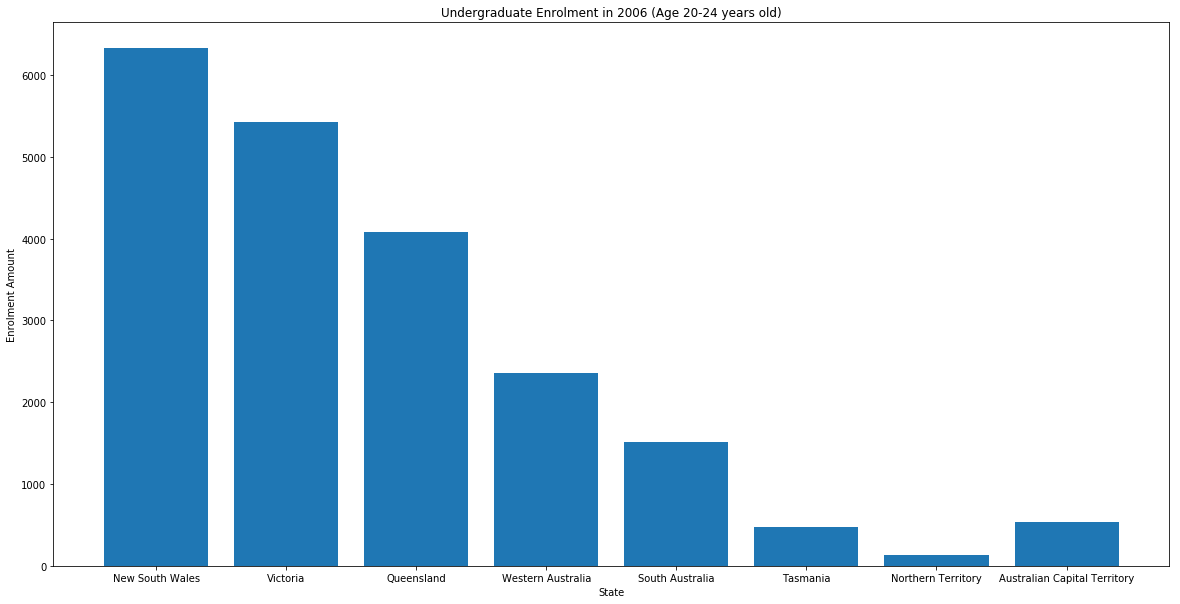

In [30]:
intervals = range(len(state_subtotal["Sub-total Undergraduate"]))
labels = list(state_name)

plt.bar(intervals, subtotal_undergrad_byage);

plt.xticks(intervals, labels);
plt.title("Undergraduate Enrolment in 2006 (Age 20-24 years old)");
plt.ylabel("Enrolment Amount");
plt.xlabel("State");

## Graduates of Highschool that is between the ages of 20-24 years old.
### Average age student graduate is 18 years old.
### The census only allows for data group of 20-24 years old.

In [31]:
"""Year 12 enrolled."""
yr12_census = census.iloc[2:10]
yr12_census

,Age in Single Years (AGEP),Unnamed: 1,20 years,21 years,22 years,23 years,24 years,TOTAL
2,NaN,Australian Capital Territory,4462.0,4448.0,4429.0,4439.0,4448.0,22226.0
3,NaN,Northern Territory,1065.0,1063.0,1181.0,1338.0,1327.0,5974.0
4,NaN,Tasmania,3498.0,3525.0,3376.0,3145.0,3027.0,16571.0
5,NaN,Western Australia,18042.0,17848.0,17017.0,16586.0,16006.0,85499.0
6,NaN,South Australia,12918.0,12925.0,12765.0,12333.0,11807.0,62748.0
7,NaN,Queensland,37669.0,37797.0,37025.0,36878.0,35357.0,184726.0
8,NaN,Victoria,48825.0,49801.0,48441.0,48017.0,47224.0,242308.0
9,NaN,New South Wales,57347.0,57651.0,56503.0,57305.0,57126.0,285932.0


In [32]:
yr12_statename = yr12_census["Unnamed: 1"]
yr12_statename

2    Australian Capital Territory
3              Northern Territory
4                        Tasmania
5               Western Australia
6                 South Australia
7                      Queensland
8                        Victoria
9                 New South Wales
Name: Unnamed: 1, dtype: object

## Year 12 graduates between the ages 20-24 years old that graduated in 2006.

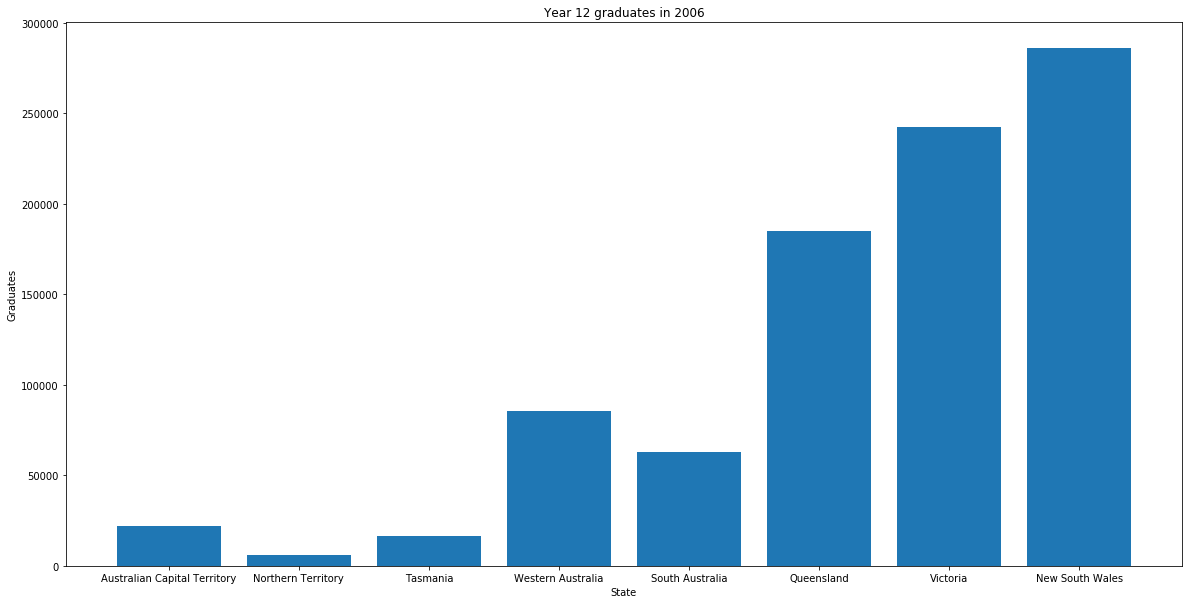

In [33]:
intervals = range(len(yr12_census["TOTAL"]))
labels = list(yr12_statename)

plt.bar(intervals, yr12_census["TOTAL"]);

plt.xticks(intervals, labels);
plt.title("Year 12 graduates in 2006");
plt.ylabel("Graduates");
plt.xlabel("State");

##  Year 12 graduates againts bachelor or bachelor equivalent enrollment.

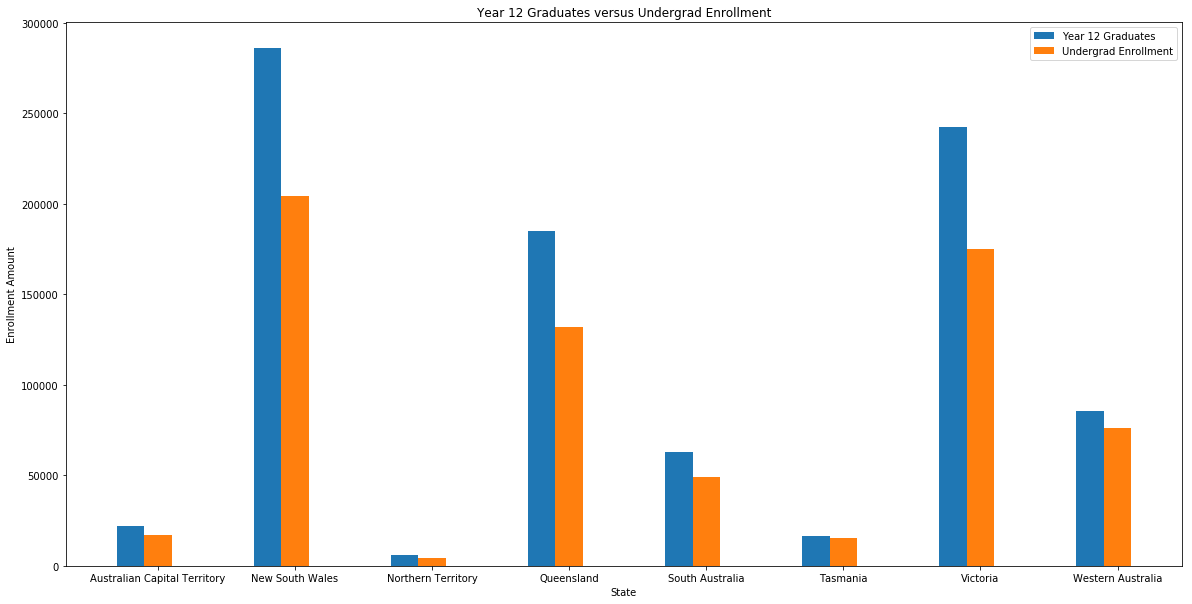

In [34]:
"""Year 12 Graduates versus Undergrad Enrollment"""

undergrad_plotdata = []
sorted_undergrad = sorted(zip(state_name, state_subtotal["Sub-total Undergraduate"]))
for i in range(len(sorted_undergrad)):
    undergrad_plotdata.append(sorted_undergrad[i][1])
# undergrad_plotdata

yr12_plotdata = []
sorted_yr12 = sorted(zip(yr12_statename, yr12_census["TOTAL"]))
for i in range(len(sorted_yr12)):
    yr12_plotdata.append(sorted_yr12[i][1])
# yr12_plotdata


index = np.arange(len(sorted_undergrad))
intervals = range(len(sorted_undergrad))
labels = list(sorted(state_name));

plt.bar(index - 0.2, yr12_plotdata, width=0.2, align="center", label="Year 12 Graduates");
plt.bar(index, undergrad_plotdata, width=0.2, align="center", label="Undergrad Enrollment");


plt.xticks(intervals, labels);
plt.title("Year 12 Graduates versus Undergrad Enrollment");
plt.xlabel("State");
plt.ylabel("Enrollment Amount");
plt.legend();

## Percentage between highschool graduates versus undergrad enrollment.

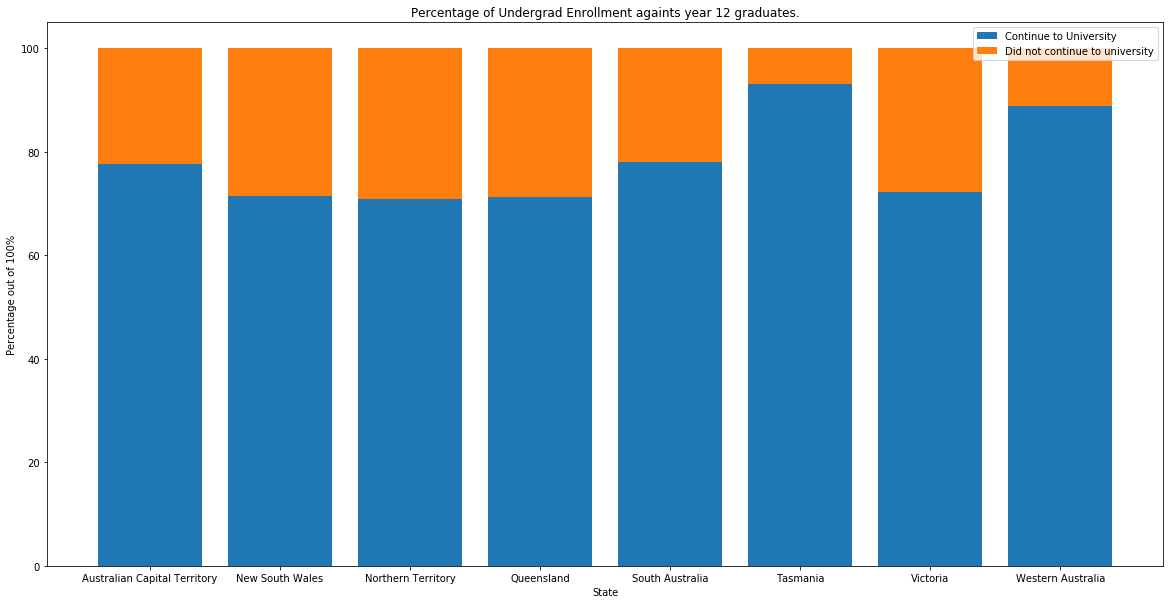

In [47]:
"""
Percentage between highschool graduates vs undergrad enrollment
Now with stacked continuing to uni/ not continuing!
This is a pull request from tom :)
"""

# yr12_plotdata
# undergrad_plotdata

percentage_edu = []
percentage_12 = []
for i in range(len(yr12_plotdata)):
    percentage_edu.append(undergrad_plotdata[i] / yr12_plotdata[i]* 100)
    percentage_12.append(100 - (undergrad_plotdata[i] / yr12_plotdata[i]* 100))

# percentage_edu

index = np.arange(len(yr12_plotdata))
intervals = range(len(yr12_plotdata))
labels = list(sorted(state_name));

plt.bar(index, percentage_edu, align="center", label="Continue to University");
plt.bar(index, percentage_12, bottom=percentage_edu , align="center", label="Did not continue to university");



plt.xticks(intervals, labels);
plt.title("Percentage of Undergrad Enrollment againts year 12 graduates.");
plt.xlabel("State");
plt.ylabel("Percentage out of 100%")
plt.legend();

## Percentage of high school graduates that enrolled into a bachelor degree.

### This data however does not show the highschool students that goes overseas for university.
### Highschool students that graduated at age 18 and went straight to uni is also not inculded in this data.
### This data does not include the amount of students that did not enter highschool yet alone university.
### This data does not include domestic students that did highschool overseas that enter university in Australia.

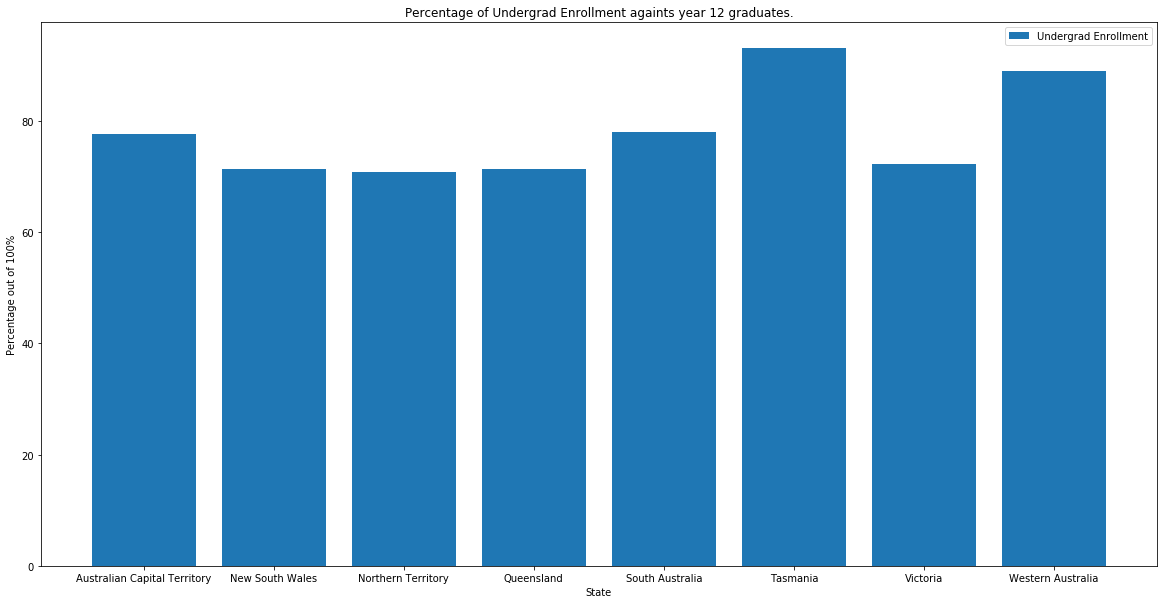

In [35]:
"""Percentage between highschool graduates vs undergrad enrollment"""

# yr12_plotdata
# undergrad_plotdata

percentage_edu = []
for i in range(len(yr12_plotdata)):
    percentage_edu.append(undergrad_plotdata[i] / yr12_plotdata[i]* 100)
# percentage_edu

index = np.arange(len(yr12_plotdata))
intervals = range(len(yr12_plotdata))
labels = list(sorted(state_name));

plt.bar(index, percentage_edu, align="center", label="Undergrad Enrollment");


plt.xticks(intervals, labels);
plt.title("Percentage of Undergrad Enrollment againts year 12 graduates.");
plt.xlabel("State");
plt.ylabel("Percentage out of 100%")
plt.legend();

# The Main Data
## Bachelor Enrollment Rate versus Immunisation Rate

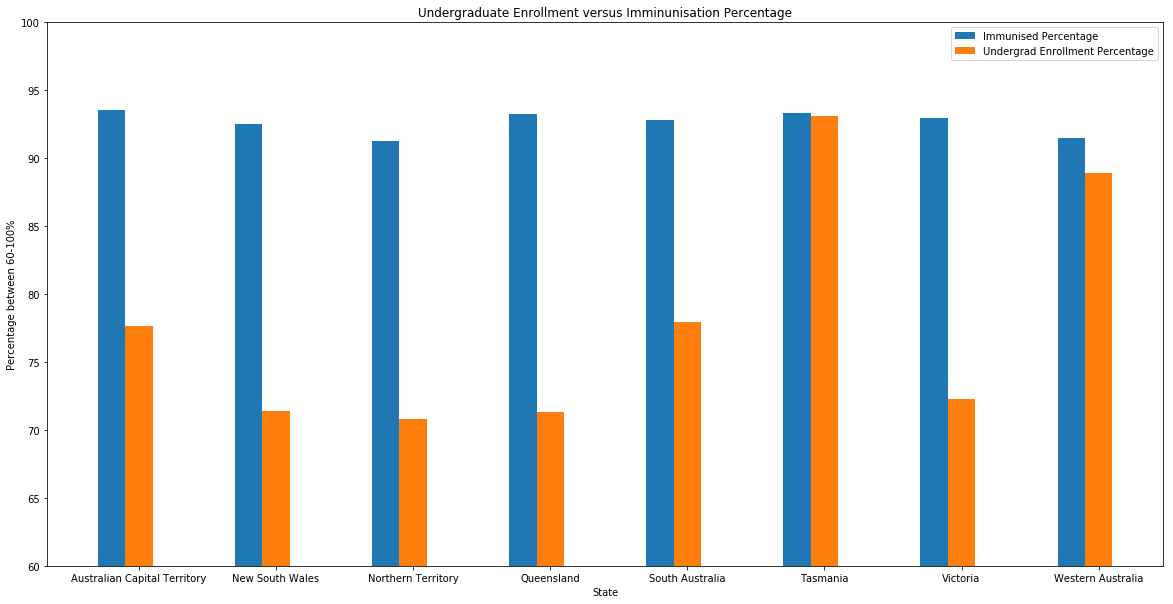

In [36]:
"""Enrollment Rate versus Immunisation Rate."""

index = np.arange(len(sorted_undergrad))
intervals = range(len(sorted_undergrad))
labels = list(sorted(state_name));

plt.bar(index - 0.2, percentage_imm, width=0.2, align="center", label="Immunised Percentage");
plt.bar(index, percentage_edu, width=0.2, align="center", label="Undergrad Enrollment Percentage");


plt.xticks(intervals, labels);
plt.title("Undergraduate Enrollment versus Imminunisation Percentage");
plt.xlabel("State");
plt.ylabel("Percentage between 60-100%");
plt.ylim([60,100])
plt.legend();

# Summary


## - Is there a correlation between university enrollment and immunisation?
## - The immunisation rate in Australia is pretty good, above 90% due to incentives.
## - Let's check out USA's immunisation rate just for fun in yucky PDF file.

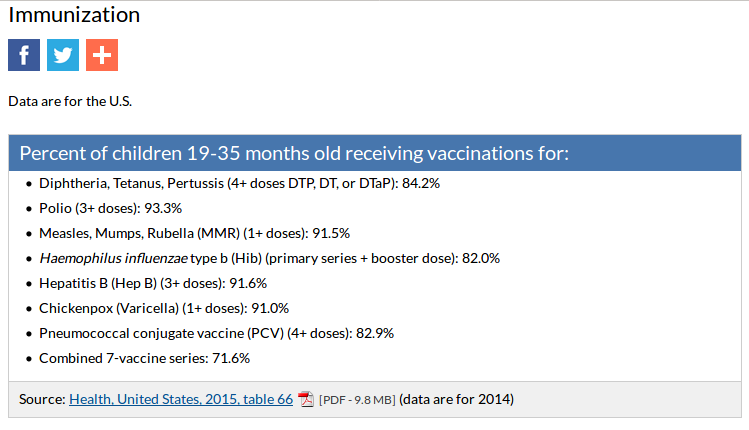

In [37]:
from IPython.display import Image
Image(filename='USA_imm.png')

## - Child immunisation comes with incentive, No Jab No Pay, such as Child Care Benefit, Child Care Rebate and Family Tax Benefit.
### (Incentives include tax supplement as big as 726 dollar per child also, some school or child care can refuse students that are not immunised.)
#### source: https://www.dss.gov.au/our-responsibilities/families-and-children/benefits-payments/strengthening-immunisation-for-young-children